In [1]:
import scvi
import scanpy as sc
import anndata

Global seed set to 0


In [2]:
adata = scvi.data.purified_pbmc_dataset()

INFO     File data/PurifiedPBMCDataset.h5ad already downloaded                               
INFO     Using batches from adata.obs["batch"]                                               
INFO     Using labels from adata.obs["labels"]                                               
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 105868 cells, 21932 vars, 11      
         batches, 10 labels, and 0 proteins. Also registered 0 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [3]:
adata.obs

,cell_types,barcodes,labels,batch,_scvi_batch,_scvi_labels
0,cd4_t_helper,AAACATACAACGAA-1,0,0,0,0
1,cd4_t_helper,AAACATACAGGTTC-1,0,0,0,0
2,cd4_t_helper,AAACATACCCTTGC-1,0,0,0,0
3,cd4_t_helper,AAACATACGCGATT-1,0,0,0,0
4,cd4_t_helper,AAACATACGGAGGT-1,0,0,0,0
...,...,...,...,...,...,...
105863,cd14_monocytes,TTTCGAACGCTAAC-1,9,10,10,9
105864,cd14_monocytes,TTTCGAACTCCTGC-1,9,10,10,9
105865,cd14_monocytes,TTTGACTGAGTAGA-1,9,10,10,9
105866,cd14_monocytes,TTTGACTGTGTAGC-1,9,10,10,9


In [4]:
adata.var

""
RP11-34P13.7
RP11-34P13.8
AL627309.1
AP006222.2
RP5-857K21.4
...
AC011841.1
AL354822.1
KIR2DL2
PNRC2-1


In [5]:
adata.var['mt']=adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'],percent_top=[],log1p=False,inplace=True)
adata.obs

,cell_types,barcodes,labels,batch,_scvi_batch,_scvi_labels,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
0,cd4_t_helper,AAACATACAACGAA-1,0,0,0,0,585,1129.0,17.0,1.505757
1,cd4_t_helper,AAACATACAGGTTC-1,0,0,0,0,651,1957.0,33.0,1.686255
2,cd4_t_helper,AAACATACCCTTGC-1,0,0,0,0,345,666.0,11.0,1.651652
3,cd4_t_helper,AAACATACGCGATT-1,0,0,0,0,678,1884.0,33.0,1.751592
4,cd4_t_helper,AAACATACGGAGGT-1,0,0,0,0,358,789.0,19.0,2.408112
...,...,...,...,...,...,...,...,...,...,...
105863,cd14_monocytes,TTTCGAACGCTAAC-1,9,10,10,9,353,745.0,8.0,1.073826
105864,cd14_monocytes,TTTCGAACTCCTGC-1,9,10,10,9,442,908.0,15.0,1.651982
105865,cd14_monocytes,TTTGACTGAGTAGA-1,9,10,10,9,1074,2994.0,47.0,1.569806
105866,cd14_monocytes,TTTGACTGTGTAGC-1,9,10,10,9,324,578.0,15.0,2.595156


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc513aa59a0>,
      dtype=object)

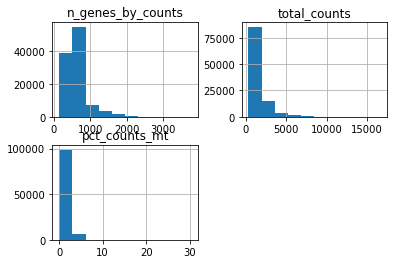

In [6]:
adata.obs.hist(column=['n_genes_by_counts','total_counts','pct_counts_mt'])

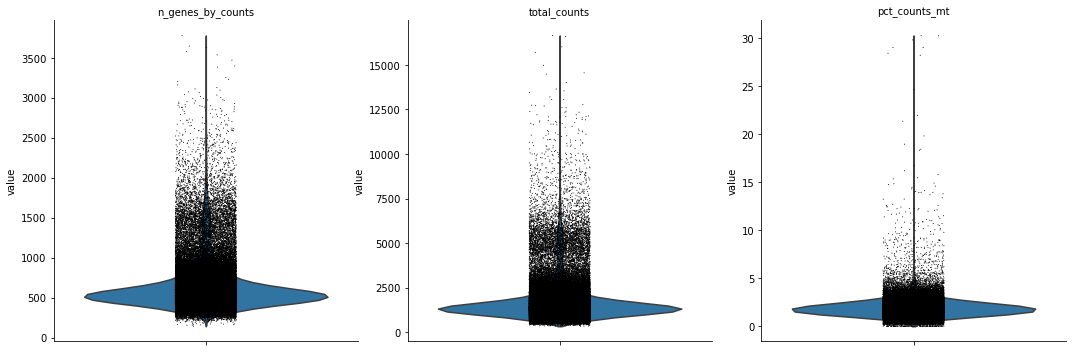

In [7]:
sc.pl.violin(adata,['n_genes_by_counts','total_counts','pct_counts_mt'],multi_panel=True )

In [8]:
sc.pp.filter_cells(adata,max_genes=2500)
sc.pp.filter_cells(adata,max_counts=7500)

In [9]:
adata=adata[adata.obs['pct_counts_mt']<7,:].copy()

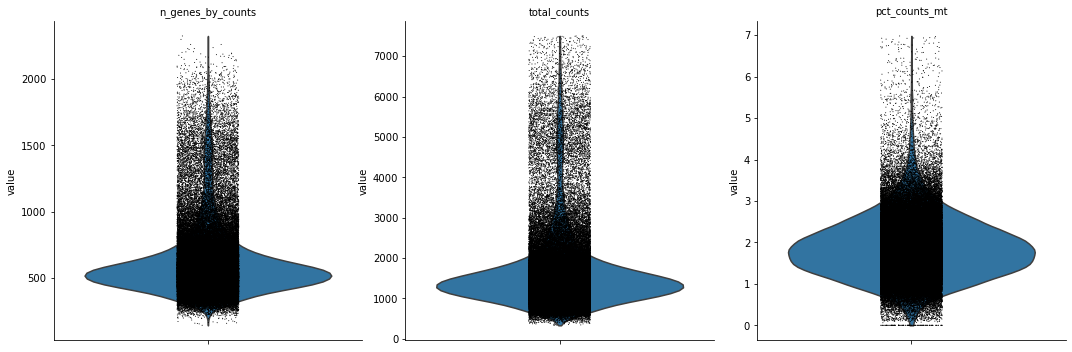

In [10]:
sc.pl.violin(adata,['n_genes_by_counts','total_counts','pct_counts_mt'],multi_panel=True )

In [11]:
adata.layers["counts"]=adata.X.copy()
sc.pp.normalize_total(adata,target_sum=7000)
sc.pp.log1p(adata)
adata.raw=adata

In [12]:
sc.pp.highly_variable_genes(adata,n_top_genes=2500)

In [13]:
adata=adata[:,adata.var.highly_variable].copy()


In [14]:
adata.obs.shape


(105177, 12)

In [15]:
sc.pp.pca(adata)

In [16]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

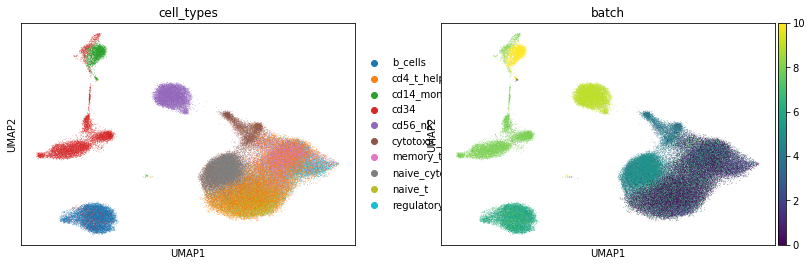

In [17]:
sc.pl.umap(adata,color=['cell_types','batch'])

In [18]:
adata.obs.nunique()

cell_types              10
barcodes             88817
labels                  10
batch                   11
_scvi_batch             11
_scvi_labels            10
n_genes_by_counts     1900
total_counts          5869
total_counts_mt        242
pct_counts_mt        38702
n_genes               1900
n_counts              5869
dtype: int64

/home/server_crash_/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans' as categorical


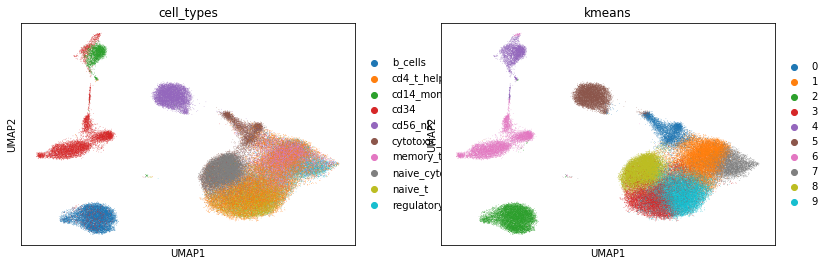

In [19]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10,random_state=0).fit(adata.obsm["X_pca"])
adata.obs["kmeans"]=kmeans.labels_.astype(str)
sc.pl.umap(adata,color=['cell_types','kmeans'])

In [20]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score
print("NMI is: ",normalized_mutual_info_score(adata.obs["cell_types"],adata.obs['kmeans']))
print("ARI is: ",adjusted_rand_score(adata.obs["cell_types"],adata.obs['kmeans']))
print("FM is: ",fowlkes_mallows_score(adata.obs["cell_types"],adata.obs['kmeans']))

NMI is:  0.6017244265485701
ARI is:  0.4110148979696127
FM is:  0.48221527276651854
